In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
NO2 = pd.read_csv("../csv/pollution_province/NO2_2019.csv")
NO2.drop(NO2.index[(NO2['Valore medio annuo³ [µg/m³]'] == 'n.d.')], inplace=True)
NO2.drop(['region_id',
          'province_id',
          'municipality_id',
          'station_code',
          'Nome della stazione',
          'Tipo di stazione²',
          'codice zona',
          'Tipo di area¹',
          'Rendimento [%]',
          'Numero di dati validi',
          'nome zona',
          'tipo di zona',
          'Comune',
          'Regione'
        ], axis=1, inplace=True)
NO2['Valore medio annuo³ [µg/m³]'] = NO2['Valore medio annuo³ [µg/m³]'].apply(int)
NO2['Over'] = NO2['Over'].apply(int)
NO2 = NO2.groupby(by='Provincia').max()


PM10 = pd.read_csv("../csv/pollution_province/PM10_2019.csv")
PM10.drop(PM10.index[(PM10['Valore medio annuo³ [µg/m³]'] == '-')], inplace=True)
PM10.drop(['region_id',
            'province_id',
            'municipality_id',
            'station_code',
            'Nome della stazione',
            'Tipo di stazione²',
            'Rendimento [%]',
            'Comune',
            'Regione',
            'Rispetta copertura minima',
            "sufficiente distribuzione temporale nell'anno",
            'numero_dati_validi',
            'TIPO DI DATI 4',
            'Codice zona',
            'Nome zona',
            'Tipo di zona¹'
        ], axis=1, inplace=True)
PM10['Valore medio annuo³ [µg/m³]'] = PM10['Valore medio annuo³ [µg/m³]'].apply(int)
PM10 = PM10.groupby(by='Provincia').mean()

PM25 = pd.read_csv("../csv/pollution_province/PM25_2019.csv")
PM25.drop(PM10.index[(PM10['Valore medio annuo³ [µg/m³]'] == '-')], inplace=True)
PM25.drop(['region_id',
            'province_id',
            'municipality_id',
            'station_code',
            'Nome della stazione',
            'Tipo di stazione²',
            'Rendimento [%]',
            'Comune',
            'Regione',
            'Rispetta copertura minima',
            "sufficiente distribuzione temporale nell'anno",
            'numero_dati_validi',
            'TIPO DI DATI 4',
            'Codice zona',
            'Nome zona'
        ], axis=1, inplace=True)
PM25['Valore medio annuo³ [µg/m³]'] = PM10['Valore medio annuo³ [µg/m³]'].apply(int)
PM25 = PM10.groupby(by='Provincia').mean()

In [2]:
infections = pd.read_csv("../csv/dpc-covid19-ita-province.csv", low_memory=False)
infection_rate = pd.DataFrame({'province':[],'infection_rate':[]})
infection_rate_2 = pd.DataFrame({'province':[],'infection_rate':[]})

infections

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65973,2021-05-28T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,69305,NaN,ITH,ITH3,ITH35
65974,2021-05-28T17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,81247,NaN,ITH,ITH3,ITH36
65975,2021-05-28T17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,13934,NaN,ITH,ITH3,ITH37
65976,2021-05-28T17:00:00,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,5329,NaN,ITH,ITH3,NaN


In [3]:
for city in infections['denominazione_provincia'].unique():
    # Only get days when there have been infected people
    subset = infections[(infections['denominazione_provincia'] == city) & (infections['totale_casi'] > 0)].sort_values('data')
  
    # Mean value of the differences between consecutive points
    city_infection_rate =  np.mean(subset['totale_casi'].diff(1))
    infection_rate = infection_rate.append(pd.DataFrame({'province':[city],'infection_rate':[city_infection_rate]}))

In [4]:
infection_rate.sort_values('infection_rate',ascending=False).head(10)

,province,infection_rate
0,Milano,588.006550
0,Napoli,539.151316
0,Roma,532.624454
0,Torino,421.530568
0,Brescia,230.884026
0,Bari,208.366446
0,Bologna,204.233480
0,Varese,186.903297
0,Verona,180.556291
0,Padova,177.329694


In [5]:
import numpy as np
from scipy import stats
#NO2 INFECTION MERGE
NO2_infections = pd.merge(NO2,infection_rate,left_on=['Provincia'],right_on=['province'])
#PM10 INFECTION MERGE
PM10_infections = pd.merge(PM10, infection_rate, left_on=['Provincia'], right_on=['province'])
#PM2.5 INFECTION MERGE
PM25_infections = pd.merge(PM25, infection_rate, left_on=['Provincia'], right_on=['province'])

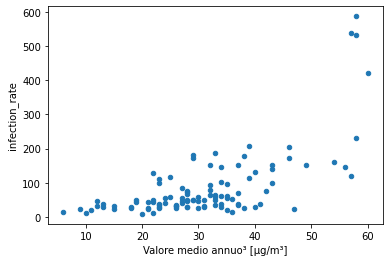

SpearmanrResult(correlation=0.5861709346787326, pvalue=6.260712838089721e-11)
(0.6609608744924734, 2.25030540791894e-14)
KendalltauResult(correlation=0.4368342693563568, pvalue=8.092069796676477e-11)


In [6]:
#NO2/COVID CORRELATION
NO2_infections.plot.scatter(x='Valore medio annuo³ [µg/m³]', y='infection_rate')
plt.show()
print(stats.spearmanr(np.array(NO2_infections['Valore medio annuo³ [µg/m³]']), np.array(NO2_infections['infection_rate'])))
print(stats.pearsonr(np.array(NO2_infections['Valore medio annuo³ [µg/m³]']), np.array(NO2_infections['infection_rate'])))
print(stats.kendalltau(np.array(NO2_infections['Valore medio annuo³ [µg/m³]']), np.array(NO2_infections['infection_rate'])))

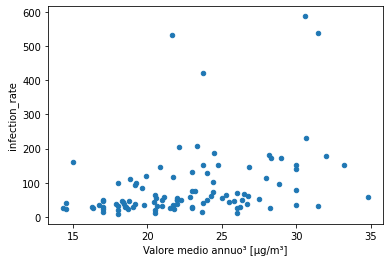

SpearmanrResult(correlation=0.46218495508694174, pvalue=1.0076675647577948e-06)
(0.364975496580668, 0.0001621948010356304)
KendalltauResult(correlation=0.3240744847950217, pvalue=1.5342544927598213e-06)


In [7]:
#PM10/COVID CORRELATION
PM10_infections.plot.scatter(x='Valore medio annuo³ [µg/m³]', y='infection_rate')
plt.show()
print(stats.spearmanr(np.array(PM10_infections['Valore medio annuo³ [µg/m³]']), np.array(PM10_infections['infection_rate'])))
print(stats.pearsonr(np.array(PM10_infections['Valore medio annuo³ [µg/m³]']), np.array(PM10_infections['infection_rate'])))
print(stats.kendalltau(np.array(PM10_infections['Valore medio annuo³ [µg/m³]']), np.array(PM10_infections['infection_rate'])))

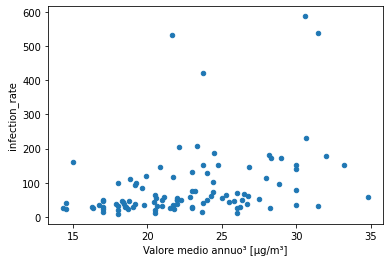

SpearmanrResult(correlation=0.46218495508694174, pvalue=1.0076675647577948e-06)
(0.364975496580668, 0.0001621948010356304)
KendalltauResult(correlation=0.3240744847950217, pvalue=1.5342544927598213e-06)


In [8]:
#PM25/COVID CORRELATION
PM25_infections.plot.scatter(x='Valore medio annuo³ [µg/m³]', y='infection_rate')
plt.show()
print(stats.spearmanr(np.array(PM25_infections['Valore medio annuo³ [µg/m³]']), np.array(PM25_infections['infection_rate'])))
print(stats.pearsonr(np.array(PM25_infections['Valore medio annuo³ [µg/m³]']), np.array(PM25_infections['infection_rate'])))
print(stats.kendalltau(np.array(PM25_infections['Valore medio annuo³ [µg/m³]']), np.array(PM25_infections['infection_rate'])))

In [9]:
for city in infections['denominazione_provincia'].unique():
    # Only get days when there have been infected people
    subset = infections[(infections['denominazione_provincia'] == city) & (infections['totale_casi'] > 0)].sort_values('data')
  
    # Mean value of the differences between consecutive points
    rate = subset['totale_casi'].diff(1).divide(subset['totale_casi'])*100
    
    city_infection_rate_2 = np.mean(rate)
    
    infection_rate_2 = infection_rate_2.append(pd.DataFrame({'province':[city],'infection_rate':[city_infection_rate_2]}))

In [10]:
infection_rate_2.sort_values('infection_rate',ascending=False).head(10)

,province,infection_rate
0,Bari,2.263284
0,Roma,2.211576
0,Como,2.127370
0,Napoli,2.123219
0,Bologna,2.116130
0,Foggia,2.072532
0,Varese,2.067925
0,Cuneo,2.054818
0,Barletta-Andria-Trani,2.045049
0,Milano,2.041100


In [11]:
import numpy as np
from scipy import stats
#NO2 INFECTION MERGE
NO2_infections = pd.merge(NO2,infection_rate_2,left_on=['Provincia'],right_on=['province'])
#PM10 INFECTION MERGE
PM10_infections = pd.merge(PM10, infection_rate_2, left_on=['Provincia'], right_on=['province'])
#PM2.5 INFECTION MERGE
PM25_infections = pd.merge(PM25, infection_rate_2, left_on=['Provincia'], right_on=['province'])


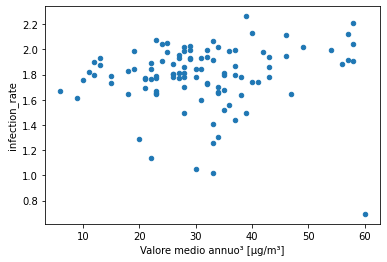

SpearmanrResult(correlation=0.16224788717838873, pvalue=0.09985957301580084)
(0.07742699837387361, 0.43466487678459265)
KendalltauResult(correlation=0.11525471639592458, pvalue=0.08640581298215315)


In [12]:
#NO2/COVID CORRELATION
NO2_infections.plot.scatter(x='Valore medio annuo³ [µg/m³]', y='infection_rate')
plt.show()
print(stats.spearmanr(np.array(NO2_infections['Valore medio annuo³ [µg/m³]']), np.array(NO2_infections['infection_rate'])))
print(stats.pearsonr(np.array(NO2_infections['Valore medio annuo³ [µg/m³]']), np.array(NO2_infections['infection_rate'])))
print(stats.kendalltau(np.array(NO2_infections['Valore medio annuo³ [µg/m³]']), np.array(NO2_infections['infection_rate'])))

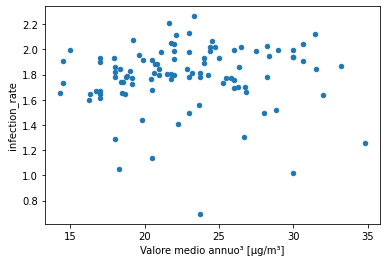

SpearmanrResult(correlation=0.18424959884022943, pvalue=0.06376767631471424)
(0.045556810223726055, 0.6493489184650199)
KendalltauResult(correlation=0.12596396942092902, pvalue=0.061717960220654004)


In [13]:
#PM10/COVID CORRELATION
PM10_infections.plot.scatter(x='Valore medio annuo³ [µg/m³]', y='infection_rate')
plt.show()
print(stats.spearmanr(np.array(PM10_infections['Valore medio annuo³ [µg/m³]']), np.array(PM10_infections['infection_rate'])))
print(stats.pearsonr(np.array(PM10_infections['Valore medio annuo³ [µg/m³]']), np.array(PM10_infections['infection_rate'])))
print(stats.kendalltau(np.array(PM10_infections['Valore medio annuo³ [µg/m³]']), np.array(PM10_infections['infection_rate'])))

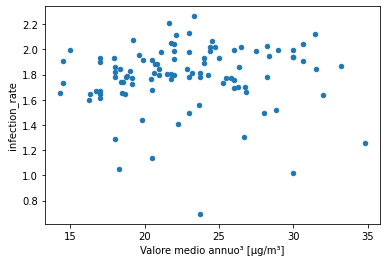

SpearmanrResult(correlation=0.18424959884022943, pvalue=0.06376767631471424)
(0.045556810223726055, 0.6493489184650199)
KendalltauResult(correlation=0.12596396942092902, pvalue=0.061717960220654004)


In [14]:
#PM25/COVID CORRELATION
PM25_infections.plot.scatter(x='Valore medio annuo³ [µg/m³]', y='infection_rate')
plt.show()
print(stats.spearmanr(np.array(PM25_infections['Valore medio annuo³ [µg/m³]']), np.array(PM25_infections['infection_rate'])))
print(stats.pearsonr(np.array(PM25_infections['Valore medio annuo³ [µg/m³]']), np.array(PM25_infections['infection_rate'])))
print(stats.kendalltau(np.array(PM25_infections['Valore medio annuo³ [µg/m³]']), np.array(PM25_infections['infection_rate'])))